In [1]:
library('locpol')

In [2]:
run_sim = function(N_sample=150,x_min=-12,x_max=12,
              sig=.25,bandw=.5,degree=0,kern=gaussK){

    # generate simulated training data 
    x_train = sort(runif(N_sample,x_min,x_max))
    y_train = sin(x_train)+sin(x_train/2)+rnorm(N_sample,0,sig)

    # build kernr prediction function (there is really not 'model' object)
    kern_predict = function(xnew){
        mdl = locPolSmootherC(x=x_train,y=y_train,xeval=xnew,
                              bw=bandw,deg=0,kernel=gaussK)
        return(mdl$beta0)
    }

    # training preds
    y_hat_train = kern_predict(x_train)

    return(list(
        'x_train'=x_train,
        'y_train'=y_train,
        'predict_fn'=kern_predict,
        'y_hat_train'=y_hat_train
    ))
}

In [3]:
read_or_run = function(cache_file,func,...){
    if(!file.exists(cache_file)){
        cat("Running func...");flush.console()
        obj = func(...)
        saveRDS(object=obj,file=cache_file)
    } else {
        cat("Reading from cache...");flush.console()
        obj = readRDS(file=cache_file)
    }
    return(obj)
}

In [4]:
dir.create('res/',showWarnings=FALSE)

In [5]:
run_cache_sim = function(file,...){
    return(read_or_run(cache_file=paste0("res/",file),
                       func=function(){run_sim(...)}))
}

In [6]:
sims = list(
    'basic'=run_cache_sim("basic"),
    'low_bw'=run_cache_sim("low_bw",bandw=0.05),
    'high_N'=run_cache_sim("high_N",N_sample=500),
    'high_N_cos'=run_cache_sim("high_N_cos",kern=CosK,N_sample=500)
)

Reading from cache...Reading from cache...Reading from cache...Reading from cache...

In [7]:
plot_it = function(sim_name){
    sim = sims[[sim_name]]
    plot(sim$x_train,sim$y_train,main=sim_name)
    lines(sim$x_train,sim$y_hat_train,col='red',lwd=2)
}

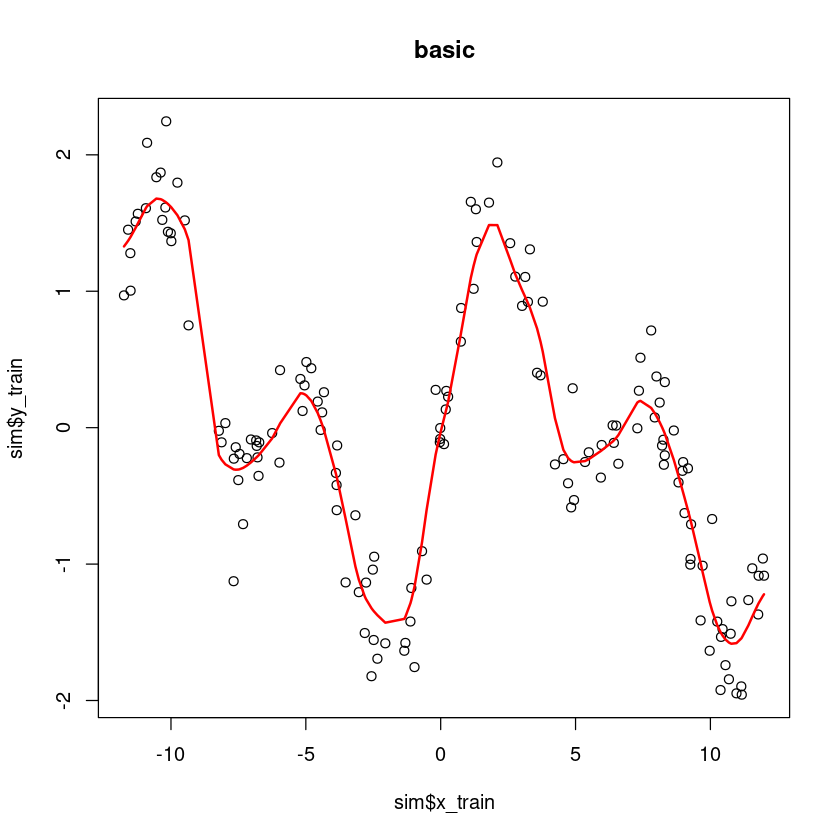

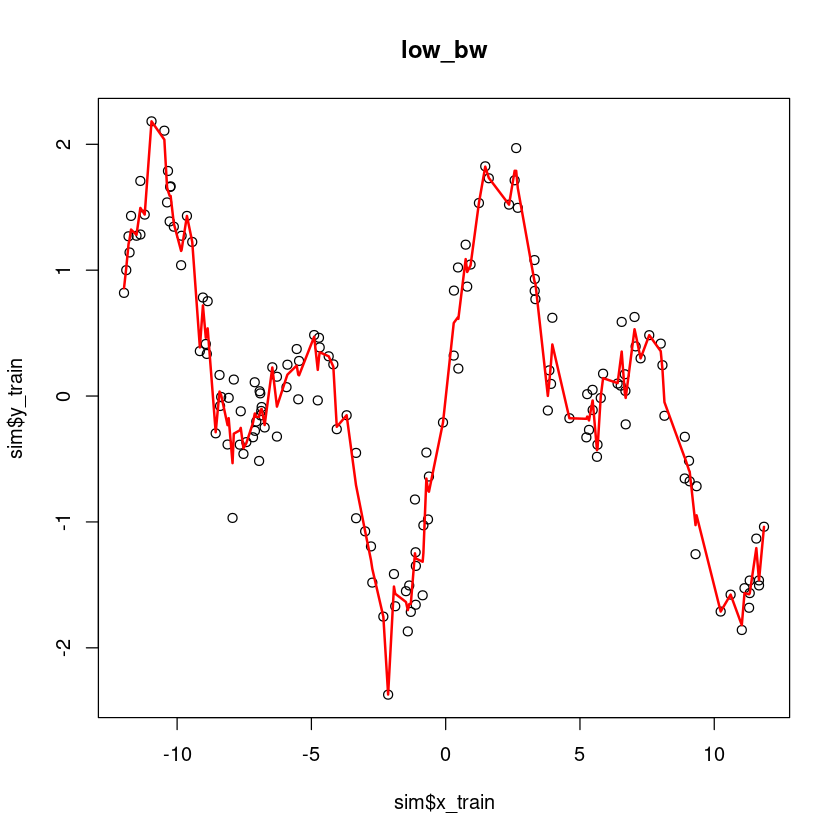

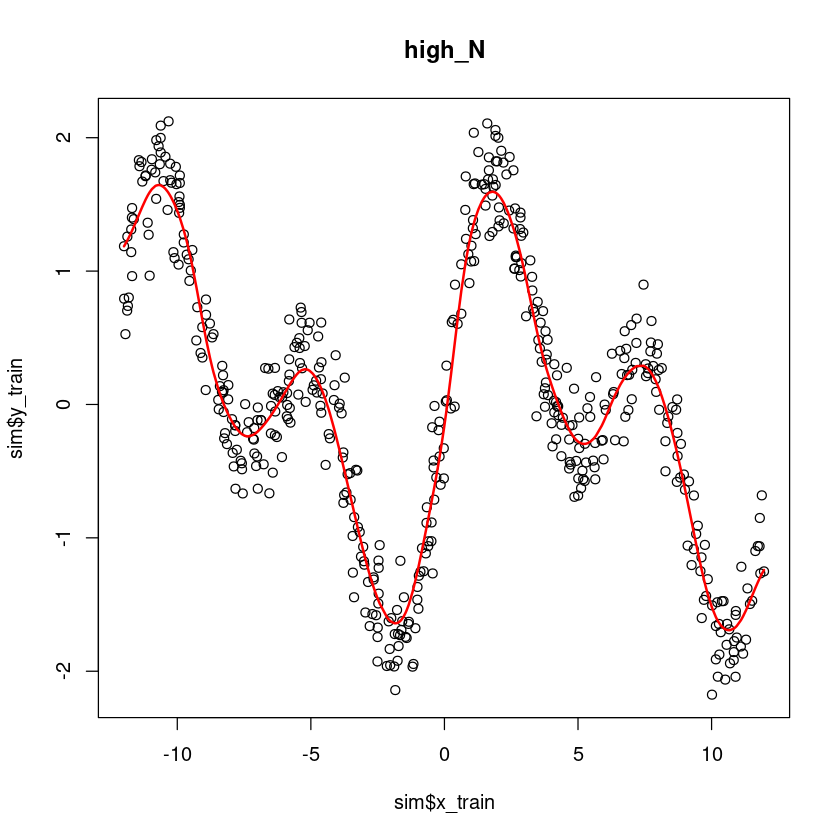

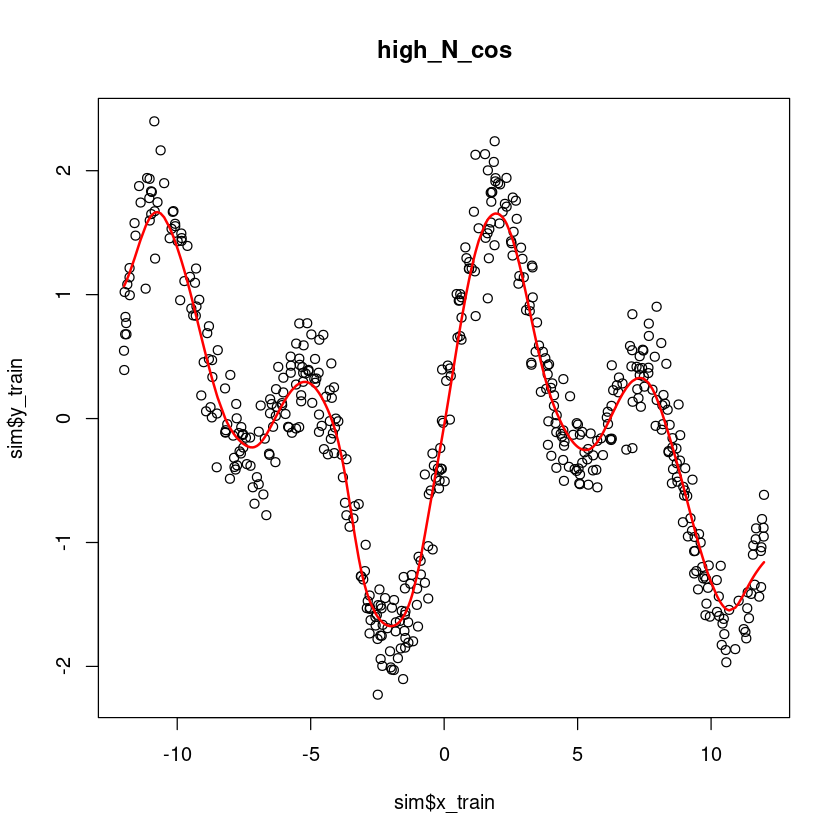

In [8]:
toss = lapply(names(sims),plot_it)